## 1. Сохранение данных и изучение общей информации 

Первым шагом настроим окружение: импортируем все необходимые библиотеки.

Просмотрим представленную информацию архива объявлений о продаже квартир в Санкт-Петербурге и области.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

realty_ya = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(realty_ya)
realty_ya.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Архив объявлений о продаже квартир сервиса Яндекс.Недвижимость в Санкт-Петербурге и соседних населённых пунктах содержит данные 23699 объектов недвижимости, которые описываются 22 характеристиками. Для корректного исследования объявлений о продаже квартир массив данных требует обработки пропущенных значений и приведения к соответствующему типу данные даты публикации, этажности дома, является ли объект недвижимости апартаментами.

## 2. Предобработка данных

Выявим в каких столбцах из представленного массива данных имеются пропуски и последовательно их обработаем. 
Создадим функцию для отображения доли пропущенных значений.

In [2]:
def missed_data_fraction(column):
    NaN_fraction = realty_ya[column].isnull().sum() / len(realty_ya)
    print('Доля пропущенных значений составляет: {:.1%}'.format(NaN_fraction))

##### 2.1. Число балконов

Предположим, если не указано число балконов, то вероятно их нет. Такие пропуски заменим на 0.

In [3]:
# заменяем пропуски в столбце "число балконов" нулями и переводим тип данных в целочисленный
realty_ya['balcony'] = realty_ya['balcony'].fillna(0).astype('int')

# проверяем работу методов
#realty_ya.info()

##### 2.2. Этажность дома

In [4]:
# Просмотр строк с пропущенными значениями
realty_ya[realty_ya['floors_total'].isnull()].head()

# заменяем пропуски в столбце "всего этажей в доме" -1 и переводим тип данных в целочисленный
realty_ya['floors_total'] = realty_ya['floors_total'].fillna(-1).astype('int')

#realty_ya.info()

##### 2.3. Высота потолков помещений
Предположим, что высота потолков квартир зависит от серии проекта застройки жилых домов. Для каждой серии характерно конкретное количество этажей. Предлагается сгруппировать данные по количеству этажей и для каждой группы найти медианное значение высоты потолков. Далее заменим пропущенные значения в столбце на соответствующие медианы. 

In [5]:
# заполняем пропущенные данные в столбце "высота потолков" на медиану,
# сгруппировав данные по этажности дома
realty_ya['ceiling_height'] = realty_ya['ceiling_height']. \
fillna(realty_ya.groupby('floors_total')['ceiling_height'].transform('median'))

# вывод первых строк массива для проверки корректности выполнения метода 
display(realty_ya.head())
print(realty_ya['ceiling_height'].isna().value_counts())

# одно значение NaN не заполнилось медианой, просмотр строки на предмет удаления
print(realty_ya[realty_ya['ceiling_height'].isnull()])

# удаление строки, поскольку квартиры 33-этажном в доме не присутствую в данной выборке
realty_ya.dropna(subset = ['ceiling_height'], inplace = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


False    23698
True         1
Name: ceiling_height, dtype: int64
       total_images  last_price  total_area first_day_exposition  rooms  \
11575             9   9900000.0       101.0  2016-04-28T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
11575             NaN            33         53.0     32        False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
11575          21.0        0  Санкт-Петербург           18732.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
11575             20444.0               0.0            NaN               3.0   

       ponds_nearest  days_exposition  
11575           80.0             53.0  

[1 rows x 22 columns]


##### 2.4. Жилая площадь помещений

In [6]:
# рассчитаем долю пропущенных значений
missed_data_fraction('living_area')

Доля пропущенных значений составляет: 8.0%


Для пропущенных значений в категории жилой площади помещений нет подходящего значения для заполнения. Необходимо уточнять информацию у отдела, отвечающего за сбор данных, либо по крайней мере знать, какого года постройки дом, чтобы примерно оценить типичную жилую площадь помещений для каждой серии жилых строений. Оставим пропуски без изменений, так как доля пропущенных значений составляет **8.0%**, удаление строк повлечет за собой уменьшение объема интересующих нас данных других характеристик объявлений.

##### 2.5. Площадь кухни

Для квартир-студий нет чёткого разделения на жилую площадь и площадь кухни, поэтому заменим соответствующие пропуски нулями.

In [7]:
# для квартир-студий заполним пропущенные значения нулями
realty_ya.loc[realty_ya['studio'] == True, 'kitchen_area'] = 0

# рассчитаем долю пропусков в данных
missed_data_fraction('kitchen_area')

Доля пропущенных значений составляет: 9.0%


Оставшиеся пропущенные значения, как и в случае с жилой площадь помещений, затруднительно заполнить корректными данными, кроме того их доля велика (**9.0%**). Поэтому отсутствующие данные не обрабатывались.

##### 2.6. Тип помещения: апартаменты/квартира

Предположим, что если в объявлении о продаже не указан тип помещения - апартаменты, то недвижимость относится к типу - квартира. Заменим соответствующие пропущенные значения на False.

In [8]:
print(realty_ya['is_apartment'].value_counts())

realty_ya['is_apartment'] = realty_ya['is_apartment'].fillna(value = False)

False    2724
True       50
Name: is_apartment, dtype: int64


##### 2.7. Название населенного пункта

На основании представленных данных мы не можем с уверенностью судить, к какому городу относятся данные с пропущенными значениями. Поскольку доля пропущенных значений незначительна (**0.2%**), принято решение удалить строки с пропусками.

In [9]:
missed_data_fraction('locality_name')

# удаляем пропуски в столбце "locality_name"
realty_ya.dropna(subset = ['locality_name'], inplace = True)

Доля пропущенных значений составляет: 0.2%


##### 2.8. Расстояние до центра населенного пункта

Для анализа зависимости цены квартиры от удаленности от центра нас интересуют только данные, предоставленные для Санкт-Петербурга. Изучим и обработаем пропущенные данные, относящиеся к северной столице. Доля пропущенных значений для СПб незначительная (**0.3%**), на результат исследования влиять не будет, поэтому в массиве данных удалены соответствующие строки.

In [10]:
# рассчитаем долю пропущенных значений расстояния до центра для Санкт-Петербурга
NaN_Spb_fraction = (len(realty_ya[(realty_ya['cityCenters_nearest'].isnull()) \
                & (realty_ya['locality_name'] == 'Санкт-Петербург')])) / len(realty_ya)
print('Доля пропущенных значений составляет: {:.1%}'.format(NaN_Spb_fraction))

# удалим пропуски
index_names = realty_ya[ (realty_ya['cityCenters_nearest'].isnull()) & (realty_ya['locality_name'] == 'Санкт-Петербург')].index
realty_ya.drop(index_names, inplace = True)

Доля пропущенных значений составляет: 0.3%


##### 2.9. Расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма.
Данные представленных столбцов не учитываются в исследовании объявлений о продаже квартир. Имеющиеся пропущенные значения не обрабатывались. 

##### 2.10. Дата публикации объявления
Переведем значения в столбце "дата публикации" в формат даты.

In [11]:
realty_ya['first_day_exposition'] = \
pd.to_datetime(realty_ya['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#realty_ya.info()

##### 2.11. Длительность размещения объявления
Посчитаем долю пропущенных значений и заменим пропуски на медиану. Далее заменим тип данных на целочисленный.

In [12]:
# рассчитаем долю пропущенных значений
missed_data_fraction('days_exposition')

# расчет медианы столбца "days_exposition" и замена пропущенных значений в столбце, соответственно
days_exp_median = realty_ya['days_exposition'].median()
realty_ya['days_exposition'] = realty_ya['days_exposition'].fillna(value = days_exp_median)

# заменим тип данных на целочисленный
realty_ya['days_exposition'] = realty_ya['days_exposition'].astype('int')

Доля пропущенных значений составляет: 13.3%


##### 2.12. Число комнат
Проверим, к какому числу комнат в наборе данных отнесена категория "студии". Просмотрим какие имеются уникальные значения и посчитаем их количество методом value_counts().

In [13]:
realty_ya[realty_ya['studio'] == True]['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Примем, что в случае объявлений по продаже квартир-студий количество комнат будем считать равным нулю. Обобщим данные.

In [14]:
realty_ya.loc[realty_ya['studio'] == True, 'rooms'] = 0
#realty_ya[realty_ya['studio'] == True]['rooms'].value_counts()

***Просморим информацию о наборе данных после всех преобразований.***

In [15]:
realty_ya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23588 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23588 non-null int64
last_price              23588 non-null float64
total_area              23588 non-null float64
first_day_exposition    23588 non-null datetime64[ns]
rooms                   23588 non-null int64
ceiling_height          23588 non-null float64
floors_total            23588 non-null int64
living_area             21706 non-null float64
floor                   23588 non-null int64
is_apartment            23588 non-null bool
studio                  23588 non-null bool
open_plan               23588 non-null bool
kitchen_area            21484 non-null float64
balcony                 23588 non-null int64
locality_name           23588 non-null object
airports_nearest        18115 non-null float64
cityCenters_nearest     18138 non-null float64
parks_around3000        18139 non-null float64
parks_nearest           8064 non-null float64
ponds_around

### Вывод
Изучена информация архива объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
###### 1. Данные даты публикации объявления о продаже переведены в формат даты.
###### 2. Выявлены и изучены пропущенные значения в столбцах:
   - *`Число балконов.`* Пропуски заменены на 0. Вещественный тип данных изменен на целочисленный;
   - *`Всего этажей в доме.`* Пропущенные значения не заполнялись, так как подходящего значения на замену нет;
   - *`Высота потолков помещения.`* Отсутствующие данные в строках заполнены медианами для сгруппированных данных по общему количеству этажей. Такой метод заполнения был выбран исходя их предположения, что высота потолков связана с типовой серией домов, которая косвенно согласуется с количеством этажей;
   - *`Жилая площадь помещения в квадратных метрах.`* Доля пропущенных значений составляет **8.0%**. Отсутствующие данные не обрабатывались, так как затруднительно с достаточной точностью оценить среднюю площадь жилых помещений и заполнить пропуски соответствующими значениями. В то же время доля пропусков велика и удаление строк приведет к снижению данных выборки для других признаков квартир, которые участвуют в анализе.
   - *`Площадь кухни в квадратных метрах.`* Для квартир-студий пропущенные значения заполнены нулями, так как в таком типе квартир нет разделения на жилую площадь и площадь кухни;
   - *`Тип помещения: апартаменты/квартира.`* Пропущенные значения заменены на False на основании предположения, что пропуски относятся к типу - квартира;
   - *`Название населённого пункта.`* Доля строк с пропущенными значениями составляет ***0.2%***, принято решение удалить эти строки;
   - *`Расстояние до центра города.`* Для анализа нас интересуют только данные для Санкт-Петербурга. Пропущенные значения в данных составляют **0.3%**, строки с пропущенными значениями расстояния до центра Петербурга удалены;
   - *`Расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма.`* Данные не рассматриваются в дальнейшем для исследовательского анализа данных и остались без изменений;
   - *`Длительность размещения объявления.`* Доля пропущенных значений длительности размещения объявления составляет ***13.5%***. Пропуски заменены на медиану и далее тип данных заменен на целочисленный;
   - *`Число комнат в квартире.`* Для квартир-студий установили число комнат равными нулю.

## 3. Расчет параметров и дополнение данных таблицы

###### 3.1. Добавим в таблицу столбец со стоимостью 1 квадратного метра.

In [16]:
realty_ya['price_per_m2'] = (realty_ya['last_price'] / realty_ya['total_area']).round(decimals = 1)

###### 3.2. Добавим в таблицу столбцы: день недели, месяц, год публикации объявления о продаже.

In [17]:
realty_ya['weekday'] = realty_ya['first_day_exposition'].dt.weekday
realty_ya['month'] = realty_ya['first_day_exposition'].dt.month
realty_ya['year'] = realty_ya['first_day_exposition'].dt.year

###### 3.3. Добавим столбец с этажом квартиры: первый, последний, другой

In [18]:
def what_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

    
realty_ya['floor_group'] = realty_ya.apply(what_floor, axis=1)

###### 3.4. Рассчитаем и добавим в таблицу столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей, соответственно.

In [19]:
realty_ya['living_area_part'] = (realty_ya['living_area'] / realty_ya['total_area']).round(decimals = 2)
realty_ya['kitchen_area_part'] = (realty_ya['kitchen_area'] / realty_ya['total_area']).round(decimals = 2)

# проверим работу выполненных на шаге 3 действий и выведем первые 5 строк массива
display(realty_ya.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_group,living_area_part,kitchen_area_part
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,95,120370.4,3,3,2019,Другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0.0,NaN,81,82920.8,1,12,2018,Первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2.0,574.0,558,92785.7,3,8,2015,Другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,3.0,234.0,424,408176.1,4,7,2015,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.0,1,6,2018,Другой,0.32,0.41


## 4. Исследовательский анализ данных

#### 4.1. Исследуем следующие параметры объектов недвижимости:
```
площадь
цена
число комнат
высота потолков
время продажи квартиры
```
Изучим распределение данных, построим гистограммы для каждого параметра.

###### 4.1.1. Площадь квартиры
Построим и изучим гистограмму распределения объявлений в сервисе Яндекс.Недвижимость по общей площади квартир.

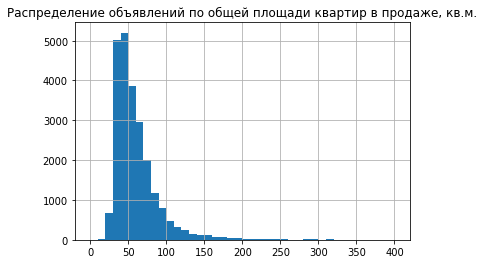

In [20]:
# display(realty_ya.sort_values('total_area', ascending = False))
realty_ya.hist('total_area', bins = 40, range = (0, 400))
plt.title('Распределение объявлений по общей площади квартир в продаже, кв.м.')
plt.show()

Из гистограммы видно, что пик значений соответствует площади квартир 40-55 кв.м. Эти данные выглядят вполне логично, так как соответствуют основной доле предложения на рынке недвижимости. Также наблюдаем крайне малое количество объявлений квартир с площадью более 200 кв.м. 

Для визуальной оценки характеристик распределения воспользуемся методом boxplot() и построим диаграмму размаха. Методом describe() определим числовые характеристики распределения.

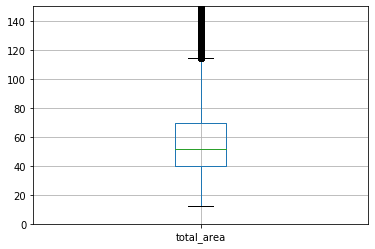

count    23588.000000
mean        60.253936
std         35.493574
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [21]:
realty_ya.boxplot('total_area')
plt.ylim(0, 150)
plt.show()

display(realty_ya['total_area'].describe())

Основное количество значений площади квартир находится в интервале 40-70 кв.м. Нижний "ус" упирается в минимальное значение (12 кв.м.). Значения выброса находятся выше 115 кв.м. Количество выбросов достаточно велико, отдельные значения сливаются в сплошную линию. Однако, поскольку медиана не стремится к длинному хвосту, можно считать, что в выборке значения выбросов не в подавляющем количестве.

О значительном разбросе и наличии аномалий в наборе данных общей площади квартир также свидетельствуют результаты числового описания данных:
- высокое значение стандартного отклонения(***~36***);
- среднее арифметическое значение на ***~15%*** больше медианы.

На диаграмме разброса имеются отдельные выбросы до 900 кв.м.

**Проведем вышеуказанную последовательность действий и для других параметров.**

###### 4.1.2. Цена продажи квартиры на момент снятия публикации

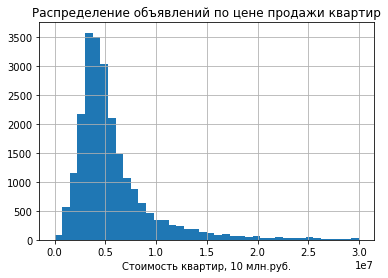

In [22]:
realty_ya.hist('last_price', bins = 40, range = (0, 30000000))
plt.title('Распределение объявлений по цене продажи квартир')
plt.xlabel('Стоимость квартир, 10 млн.руб.')

plt.show()

Максимум распределения приходится на стоимость квартир в диапазоне 3-5 млн.р. Квартир со стоимостью более 15 млн.руб. существенно меньше. 

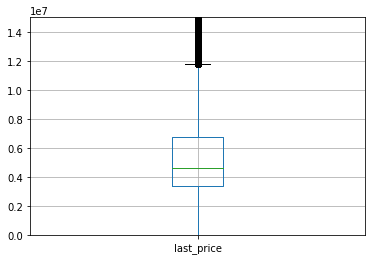

count    2.358800e+04
mean     6.517316e+06
std      1.085333e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.626540e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [23]:
realty_ya.boxplot('last_price')
plt.ylim(0, 15000000)
plt.show()

display(realty_ya['last_price'].describe())

Из гистограммы и диаграммы размаха можно судить, что основное предложение на рынке составляют квартиры стоимостью 3.5-7 млн.р. При этом в архиве объявлений разброс стоимости квартир значительный, средняя цена на ~40% выше медианы, более того стандартное отклонение превышает среднее арифметическое в ~1.6 раз. Разница между максимальным и минимальным значениями цен составляет 4 порядка. Имеются выбросы, соответствующие стоимости квартир более 12 млн.р. Также имеется выброс при стоимости квартиры 12 тыс.р. Возможно, в выборку попало объявление о помесячной сдаче квартиры.

###### 4.1.3. Распределение объявлений по числу комнат

Для наглядности распределения по числу комнат построим столбчатую диаграмму.

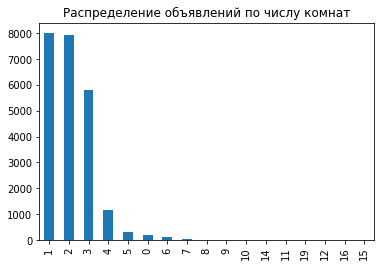

In [24]:
realty_ya['rooms'].value_counts().plot(kind='bar')
plt.title('Распределение объявлений по числу комнат')

plt.show()

Имеется тенденция снижения предложения квартир с увеличением количества комнат. Однокомнатные и двухкомнатные квартиры наиболее популярны на рынке жилья. Наблюдается низкое предложение студий, объявлений о продаже квартир с более чем 6 комнат практически нет.

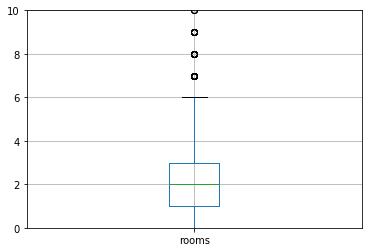

count    23588.000000
mean         2.068976
std          1.078132
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [25]:
realty_ya.boxplot('rooms')
plt.ylim(0, 10)
plt.show()

display(realty_ya['rooms'].describe())

Большая часть объявлений относится к продаже одно-, двух- и трехкомнатных квартир, что выглядит правдоподобно. Объявления о продаже квартир с количеством комнат более 6 являются редкими и выбивающимися. Вместе с тем в выборке имеются единичные квартиры с аномально высоким числом комнат до 19.

###### 4.1.4. Распределение предложений продажи квартир по высоте потолков

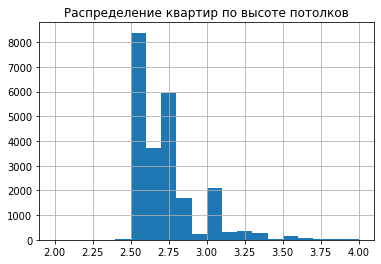

In [26]:
realty_ya.hist('ceiling_height', bins = 20, range = (2, 4))
plt.title('Распределение квартир по высоте потолков')

plt.show()

Закономерно, что наиболее часто встречаются квартиры с высотой потолков ~ 2.5 и 2.75 м. Необходимо отметить, что четверть от максимального значения приходится на квартиры с потолками 3-3.1 м. Можно предположить, что такое явление связано с достаточной популярностью в Санкт-Петербурге "сталинских" домов, для которых характерны такие высокие потолки. Также вероятно присутствие в выборке предложения жилья бизнес- и премиум-класса.

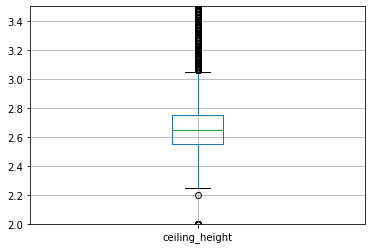

count    23588.000000
mean         2.735694
std          0.996410
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [27]:
realty_ya.boxplot('ceiling_height')
plt.ylim(2, 3.5)

plt.show()

display(realty_ya['ceiling_height'].describe())

Среднее по выборке и медиана близки между собой, но высокое значение стандартного отклонения (~1) и разница между максимальным и минимальным значением в 2 порядка свидетельствуют о существенном разбросе величин. Присутствуют объявления о продаже квартир с высотой потолков до 100 м, что не соответствует действительности. Выбросами можно считать объявления с высотой потолков более 3.1 м. Следует указать, что нижний "ус" соответсвует значению ~ 2.25 м., более того в выборке имеются значения высоты потолков до 1 м. На эту аномалию следует обратить внимание, так как согласно санитарно-гигиеническим требованиям п.5.8 СНиП 31-01-2003 высота жилых помещений от пола до потолка должна быть не менее 2.5 м.

###### 4.1.5. Распределение объявлений по времени продажи квартиры

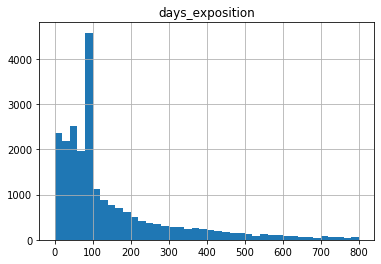

In [28]:
realty_ya.hist('days_exposition', bins = 40, range = (0, 800))

plt.show()

Из представленной гистограммы видно, что чаще всего квартиры продаются в районе 3 месяцев (~95-100 дней). Довольно подозрительно выглядят объявления со сроком размещения более 400 дней, то есть более одного года. Что может быть связано с особенностями работы агенств по недвижимости для привлечения покупателей.

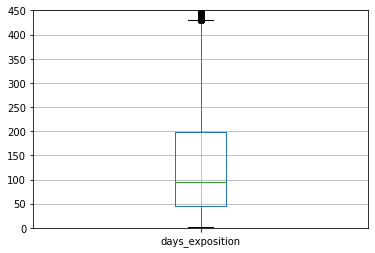

count    23588.000000
mean       169.353103
std        206.721462
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [29]:
realty_ya.boxplot('days_exposition')
plt.ylim(0, 450)
plt.show()

display(realty_ya['days_exposition'].describe())

Обычно продажа квартир занимает 45-200 дней. Разброс времени публикации объявлений в сервисе Яндекс.Недвижимость значительный, среднее время превышают медиану практически в 2 раза. Быстрой продажей является срок менее полутора месяцев. Нижний "ус" стремится к минимальному значению. В случае, когда квартира была продана более чем за 400 дней (~13 месяцев), можно считать аномально долгой продажей. Максимальный срок размещения достигает более 4 лет (1580 дней), что выглядит неправдоподобно.

### Вывод

На основе исследованных параметров недвижимости архива объявлений о продаже квартир в Санкт-Петербурге и области  - площадь, цена, число комнат, высота потолков, срок продажи - среднестатистическая квартира, опубликованная в объявлении, характеризуется следующими параметрами:
```
двухкомнатная квартира площадью ~52 м²;
высота потолков: 2.65 м;
срок продажи: ~3 месяца (95-100 дней);
стоимость: ~ 4.6 млн рублей.
```
Выявлены редкие и аномальные характеристики квартир в архиве объявлений:
```
площадь квартиры: более 115 м²;
количество комнат: более 6;
высота потолков: более 3.1 м и менее 2.25 м;
срок продажи: более 430 дней (~13 месяцев);
стоимость: более 12 млн.р.
```

#### 4.2. Удаление редких и выбивающихся значений.

Уберем с помощью метода query() выявленные редкие и аномальные значения: площади, цены, числа комнат, высоты потолков и времени продажи квартир.

In [30]:
filter_realty_ya = realty_ya.query(
'(12 <= total_area <= 115)\
and (430000 <= last_price <= 12000000)\
and (0 <= rooms <= 6)\
and (2.25 <= ceiling_height <= 3.1)\
and (1 <= days_exposition <= 430)'
)

# выведем первые 5 строк отфильтрованной таблицы
display(filter_realty_ya.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_group,living_area_part,kitchen_area_part
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0.0,NaN,81,82920.8,1,12,2018,Первый,0.46,0.27
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.0,1,6,2018,Другой,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,55,95065.8,0,9,2018,Другой,0.47,0.30
6,6,3700000.0,37.3,2017-11-02,1,2.66,26,10.6,6,False,...,0.0,NaN,155,99195.7,3,11,2017,Другой,0.28,0.39
7,5,7915000.0,71.6,2019-04-18,2,2.75,24,NaN,22,False,...,0.0,NaN,95,110544.7,3,4,2019,Другой,NaN,0.26


Вычислим долю строк с редкими и аномальными значениями в выборке после обработки данных.

In [31]:
filtered_data_fraction = 1 - (len(filter_realty_ya) / len(realty_ya))
print('Доля аномальных значений в архиве объявлений сервиса Яндекс.Недвижимость составила: {:.1%}'.format(filtered_data_fraction))

Доля аномальных значений в архиве объявлений сервиса Яндекс.Недвижимость составила: 19.9%


#### Вывод
На основе изученных на предыдущем этапе параметров объектов недвижимости Санкт-Петербурга и области была удалена 1/5 часть выбивающихся строк архива объявлений. Данные, очищенные от редких и аномальных значений, позволяют корректно оценить факторы, влияющие на стоимость квартир.

#### 4.3. Факторы, влияющие на стоимость квартиры

Создадим функцию расчета коэффициента корреляции цены квартиры c различными параметрами.

In [32]:
def correlation(parameter):
    corr = filter_realty_ya['last_price'].corr(filter_realty_ya[parameter])
    print('Коэффициент корреляции составляет: {:.2f}'.format(corr))

###### 4.3.1. Зависимость цены от общей площади квартир.

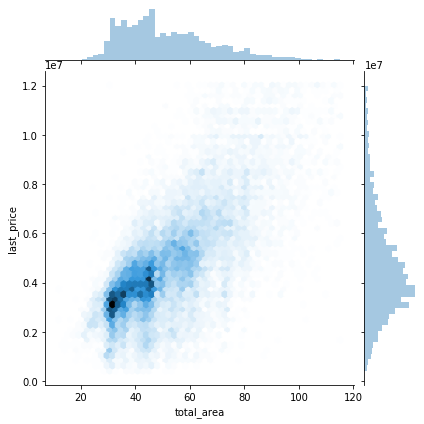

Коэффициент корреляции составляет: 0.69


In [33]:
# построим гексабиновую диаграмму зависимости цены от общей площади квартир
sns.jointplot(
    x='total_area',
    y='last_price',
    data=filter_realty_ya,
    kind='hex'
)

plt.show()

# вычислим коэффициентр корреляции
correlation('total_area')

###### 4.3.2. Зависимость цены от удаленности от центра

Коэффициент корреляции составляет: -0.32


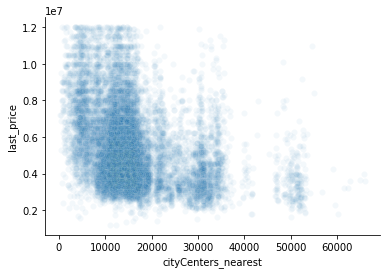

In [34]:
# построим диаграмму рассеяния зависимости стоимости недвижимости от удаленности от центра
sns.scatterplot(
    x='cityCenters_nearest',
    y='last_price',
    alpha=.05, data=filter_realty_ya    
    )

sns.despine()

# вычислим коэффициентр корреляции
correlation('cityCenters_nearest')

###### 4.3.3. Зависимость цены от числа комнат

Коэффициент корреляции составляет: 0.42


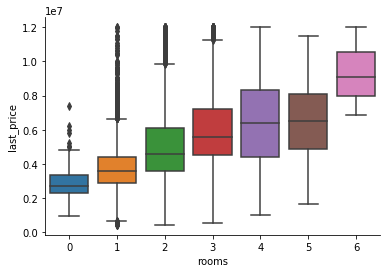

In [35]:
# для определения зависимости цены от числа комнат построим категориальный график
sns.boxplot(x="rooms", y="last_price", data=filter_realty_ya)

sns.despine()

# вычислим коэффициентр корреляции
correlation('rooms')

###### 4.3.4. Зависимость цены от этажа квартиры

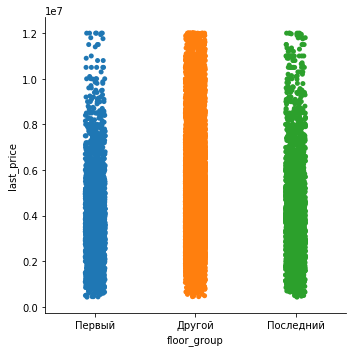

In [36]:
sns.catplot(x="floor_group", y="last_price", data=filter_realty_ya)

sns.despine()

###### 4.3.5. Зависимость цены от даты размещения: дня недели, месяца и года

Коэффициент корреляции составляет: -0.01
Коэффициент корреляции составляет: 0.00
Коэффициент корреляции составляет: 0.03


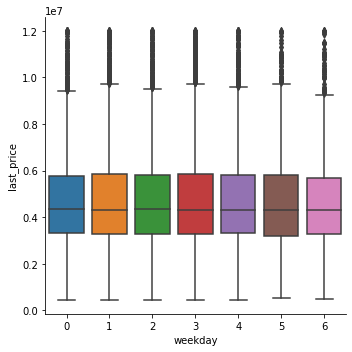

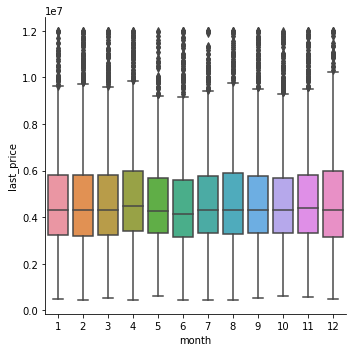

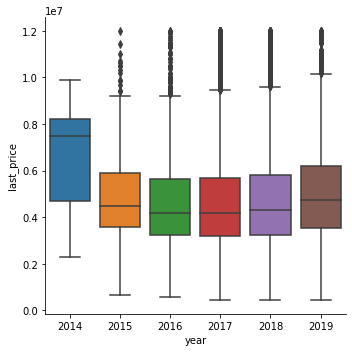

In [37]:
# с помощью цикла построим категориальные графики зависимости цены от дня недели, месяца и года 
date = ['weekday', 'month', 'year']
for val in date:
    sns.catplot(x=val, y="last_price", kind="box", data=filter_realty_ya)
    # вычислим коэффициентр корреляции для каждого параметра
    correlation(val)
    
    
sns.despine()

In [38]:
# посмотрим количество уникальных значений для корректной интерпретации
# влияния года публикации на стоимость квартиры
display(filter_realty_ya['year'].value_counts())

2018    7596
2017    6773
2019    2493
2016    1716
2015     313
2014       7
Name: year, dtype: int64

#### Вывод
1. Логично, что наибольший вклад в стоимость квартиры вносит её площадь. Наблюдается прямопропорциональная зависимость между площадью квартиры и ее стоимостью. Коэффициент корреляции составляет **0.69**.
2. С увеличением удаленности от центра стоимость квартиры снижается, при этом коэффициент корреляции равен **-0.32**.
3. Стоимость квартиры также определяется числом комнат: наиболее доступны в цене студии и однокомнатные квартиры, и с увеличением количества комнат цена недвижимости повышается. Коэффициент корреляции составляет **0.42**.
4. Как правило, квартиры на первом или последнем этаже продаются по более низкой цене, чем квартиры на других этажах. Это вызвано сниженным спросом на квартиры, располагающиеся на крайних этажах.
5. День недели и месяц публикации объявления не оказывают существенного влияния на стоимость квартиры. Средняя цена квартиры в продаже лишь незначительно снижается в летние месяцы и в январе, что связано с сезонным спадом спроса в период отпусков и новогодних праздников.
6. Необходимо отметить, что к 2014 году относится крайне малая доля объявлений, всего лишь 7 значений. Видимо, результаты относятся к концу 2014 года. Для более точного представления и выявления закономерности требуется полная выборка с данными для всего года. На основе приведенной диаграммы зависимости цены квартиры от года публикации объявления можно предположить, что после 2014 года резко снизилась средняя стоимость квартиры. Это связано с обострением геополитической обстановки и резким ухудшением макроэкономической ситуации в стране. В связи с резкими колебаниями курса валют граждане вкладывались в недвижимость с целью сохранить сбережения, спрос на квартиры повысился, что привело к повышению средней стоимости недвижимости. В период с 2015 по 2017 года наблюдался период рецессии экономики, спрос значительно снизился не только на покупку, но и на продажу недвижимости. Кроме того покупательская способность граждан была на низком уровне и стоимость квартир устойчиво снижалась вплоть до 2017 года. После 2017 года наметилось некоторое восстановление экономики, что поспособствовало увеличению спроса на квартиры и, следовательно, повышению стоимости жилья. При этом к 2014 году относится незначительная доля выборки, всего лишь 7 значений. 

###### 4.4. Топ 10 населённых пунктов  по числу объявлений

In [39]:
# рассчитаем среднюю стоимость квартиры и число объявлений для Санкт-Петербурга и соседних населенных пунктов
mean_price_m2 = filter_realty_ya.pivot_table(index='locality_name', values='last_price', aggfunc=['median', 'count'])
mean_price_m2.columns = ['median', 'count']
display(mean_price_m2.sort_values('count', ascending = False).head(10))

,median,count
locality_name,,
Санкт-Петербург,5000000.0,11876
посёлок Мурино,3400000.0,478
посёлок Шушары,3950000.0,403
Всеволожск,3465000.0,348
Колпино,3585000.0,306
посёлок Парголово,4130000.0,303
Пушкин,4900000.0,296
Гатчина,3050000.0,269
деревня Кудрово,3800000.0,262


#### Вывод
Логично, что наибольшую долю предложения на рынке недвижимости Санкт-Петербурга и области и с самой высокой стоимостью жилья занимает Санкт-Петербург.

Практически не отличается по стоимости квартир от северной столицы Пушкин, что связано с близостью к Санкт-Петербургу, транспортной доступностью и наличием музеев-заповелников и дворцово-парковых ансамблей.

Высокая доля предложения в районах, соседствующих с Санкт-Петербургом (районы Мурино, Шушары, Парголово, Кудрово), объясняется активной застройкой данной местности. Стоимость жилья ниже на ~20-30% ниже по сравнению с Санкт-Петербургом.

По мере удаления от Санкт-Петербурга стоимость жилья снижается и минимальна для Выборга.

#### 4.5. Выделение центра Санкт-Петербурга

In [40]:
# отфильтруем массив данных и оставим объявления, относящиеся к Санкт-Петербургу
spb_realty = filter_realty_ya.query('locality_name == "Санкт-Петербург"')

# создадим столбец с расстоянием до центра в километрах и приведем данные к целочисленному типу
spb_realty['center_distance_km'] =  (spb_realty['cityCenters_nearest'] / 1000).astype('int')

# рассчитаем среднюю стоимость для каждого километра
spb_center_nearest = spb_realty.pivot_table(index = 'center_distance_km', values = 'last_price', aggfunc = 'median')

display(spb_center_nearest.head(10))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,last_price
center_distance_km,
0,7835000.0
1,8300000.0
2,7550000.0
3,7295000.0
4,7200000.0
5,7050000.0
6,6400000.0
7,6395000.0
8,5700000.0


Построим столбчатую диаграмму зависимости цены квартиры от удаленности от центра.

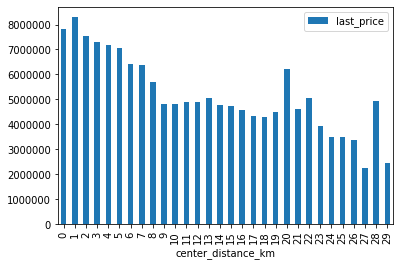

In [41]:
spb_center_nearest.plot(y='last_price', kind='bar')

plt.show()

Наблюдается скачкообразное снижение стоимости жилья при увеличении расстояния от центра от 8 к 9 км. Сегментом квартир в центре Санкт-Петербурга примем расположение в радиусе 8 км от центра. Отфильтруем данные по соответствующему условию.

In [42]:
spb_center = spb_realty.query('center_distance_km <= 8')

display(spb_center)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_group,living_area_part,kitchen_area_part,center_distance_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,100000.0,1,6,2018,Другой,0.32,0.41,8
24,8,6500000.0,97.2,2015-10-31,2,2.80,3,46.5,1,False,...,124.0,265,66872.4,5,10,2015,Первый,0.48,0.20,2
70,9,3400000.0,30.0,2018-09-05,1,2.55,5,16.0,1,False,...,NaN,14,113333.3,2,9,2018,Первый,0.53,0.23,8
94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,NaN,4,118644.1,4,4,2019,Другой,0.53,0.19,7
99,32,9600000.0,90.0,2017-09-26,4,2.55,5,67.0,2,False,...,NaN,104,106666.7,1,9,2017,Другой,0.74,0.09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23,1,2.55,16,NaN,15,False,...,230.0,113,131578.9,5,6,2018,Другой,NaN,NaN,7
23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,171.0,166,79840.0,3,4,2018,Последний,0.52,0.19,4
23665,11,4250000.0,47.0,2016-05-20,1,3.00,6,18.2,1,False,...,519.0,131,90425.5,4,5,2016,Первый,0.39,0.31,4
23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,660.0,80,122093.0,4,5,2018,Другой,0.67,0.14,7


#### Исследуем следующие параметры объектов недвижимости в центре Санкт-Петербурга:
```
площадь
цена
число комнат
высота потолков
```
Изучим распределение данных, построим и изучим диаграммы размаха каждого параметра в архиве объявлений.

###### 4.5.1. Площадь квартиры в центре Санкт-Петербурга

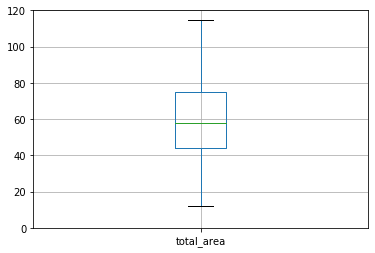

count    18898.000000
mean        51.914462
std         17.315120
min         12.000000
25%         38.500000
50%         48.000000
75%         62.000000
max        115.000000
Name: total_area, dtype: float64

count    2108.000000
mean       60.413145
std        20.378007
min        12.000000
25%        44.200000
50%        58.050000
75%        74.900000
max       115.000000
Name: total_area, dtype: float64

In [43]:
spb_center.boxplot('total_area')
plt.ylim(0, 120)
plt.show()

# выведем данные для Санкт-Петербурга и соседних населенных пунктов 
display(filter_realty_ya['total_area'].describe())

# выведем данные для центра Санкт-Петербурга
display(spb_center['total_area'].describe())

Для объявлений в центре Санкт-Петербурга по сравнению со всей областью наблюдается повышение средней площади квартир примерно на 10 м². Основное количество значений площади квартир находится в интервале 45-75 кв.м. Наблюдается двукратная разница в максимальной и минимальной площади квартир.


###### 4.5.2. Цена продажи квартиры на момент снятия публикации в центре Санкт-Петербурга

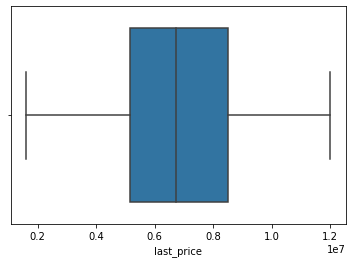

count    1.889800e+04
mean     4.725348e+06
std      2.152230e+06
min      4.300000e+05
25%      3.290000e+06
50%      4.300000e+06
75%      5.800000e+06
max      1.200000e+07
Name: last_price, dtype: float64

count    2.108000e+03
mean     6.946559e+06
std      2.297333e+06
min      1.600000e+06
25%      5.150000e+06
50%      6.737800e+06
75%      8.500000e+06
max      1.200000e+07
Name: last_price, dtype: float64

In [44]:
sns.boxplot(spb_center['last_price'])
plt.show()

# выведем данные для Санкт-Петербурга и соседних населенных пунктов 
display(filter_realty_ya['last_price'].describe())

# выведем данные для центра Санкт-Петербурга
display(spb_center['last_price'].describe())

Основное предложение на рынке недвижимости центра Санкт-Петербурга составляют квартиры стоимостью 5-8.5 млн.р., что примерно на 2.5 млн. превышает стоимость квартир для всей выборки. При этом в архиве объявлений разброс стоимости квартир значительный, максимальная цена составляет 12 млн.руб. и отличается от минимальной на порядок.

###### 4.5.3. Распределение объявлений по числу комнат квартир в центре Санкт-Петербурга

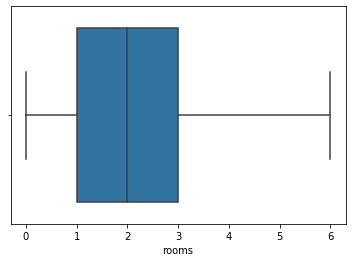

count    18898.000000
mean         1.887607
std          0.879081
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

count    2108.000000
mean        2.132353
std         0.923272
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [45]:
sns.boxplot(spb_center['rooms'])
plt.show()


# выведем данные для Санкт-Петербурга и соседних населенных пунктов 
display(filter_realty_ya['rooms'].describe())

# выведем данные для центра Санкт-Петербурга
display(spb_center['rooms'].describe())

Для центра Санкт-Петербурга наблюдается схожая картина как и для всего числа объявлений. Большая часть объявлений о продаже приходится на одно-, двух- и трехкомнатные квартиры, что выглядит правдоподобно.

###### 4.5.4. Распределение предложений продажи квартир в центре Санкт-Петербурга по высоте потолков

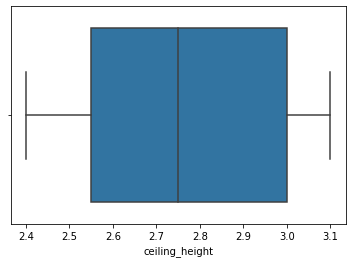

count    18898.000000
mean         2.657061
std          0.143825
min          2.250000
25%          2.550000
50%          2.600000
75%          2.750000
max          3.100000
Name: ceiling_height, dtype: float64

count    2108.000000
mean        2.769554
std         0.195426
min         2.400000
25%         2.550000
50%         2.750000
75%         3.000000
max         3.100000
Name: ceiling_height, dtype: float64

In [46]:
sns.boxplot(spb_center['ceiling_height'])
plt.show()


# выведем данные для Санкт-Петербурга и соседних населенных пунктов 
display(filter_realty_ya['ceiling_height'].describe())

# выведем данные для центра Санкт-Петербурга
display(spb_center['ceiling_height'].describe())

Для квартир в центре Санкт-Петербурга характерны более высокие потолки по сравнению с другими районами, медиана составляет **2.75 м**. Это объясняется старым фондом жилых помещений, располагающихся в исторической части города, для которых характерны высокие потолки.

#### 4.6. Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга

Исследуем зависимость стоимости квартир в центре Санкт-Петербурга от:
- числа комнат;
- этажа;
- удалённости от центра;
- даты размещения объявления.

Создадим функцию расчета коэффициента корреляции цены квартиры в центре Санкт-Петербурга c различными параметрами.

In [47]:
def correlation_spb(parameter):
    corr = spb_center['last_price'].corr(spb_center[parameter])
    print('Коэффициент корреляции составляет: {:.2f}'.format(corr))

Для определения зависимости стоимости квартир в центре Санкт-Петербурга от числа комнат, этажа, удалённости от центра и даты размещения построим категориальные графики для каждого параметра.

###### 4.6.1. Зависимость цены квартиры в центра Санкт-Петербурга от числа комнат

Коэффициент корреляции составляет: 0.47


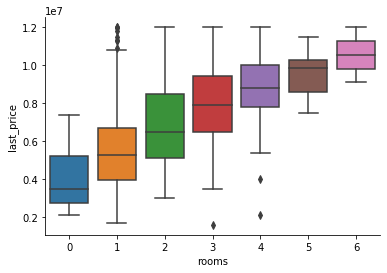

In [48]:
sns.boxplot(x="rooms", y="last_price", data=spb_center)

sns.despine()

# вычислим коэффициент корреляции для центра Санкт-Петербурга
correlation_spb('rooms')

###### 4.6.2. Зависимость цены квартиры в центре Санкт-Петербурга от этажа

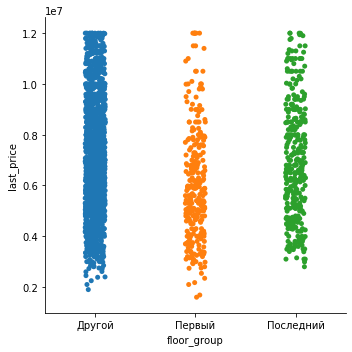

In [49]:
sns.catplot(x="floor_group", y="last_price", data=spb_center)

sns.despine()

###### 4.6.3. Зависимость цены квартире в центре Санкт-Петербурге от удаленности от центра

Коэффициент корреляции составляет: -0.20


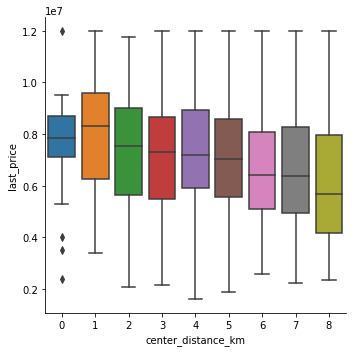

In [50]:
sns.catplot(x="center_distance_km", y="last_price", kind = 'box', data=spb_center)

sns.despine()

# вычислим коэффициент корреляции для Санкт-Петербурга
correlation_spb('center_distance_km')

###### 4.6.4.  Зависимость цены квартиры в центра Санкт-Петербурга от даты размещения: дня недели, месяца и года.

Коэффициент корреляции составляет: 0.02
Коэффициент корреляции составляет: -0.02
Коэффициент корреляции составляет: 0.03


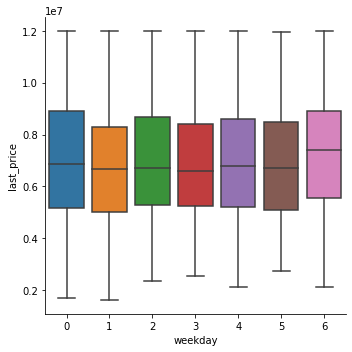

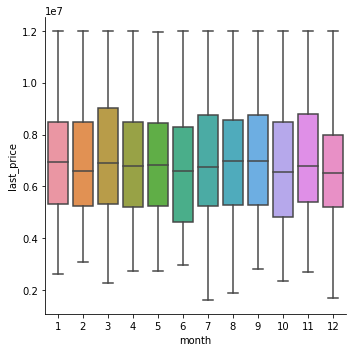

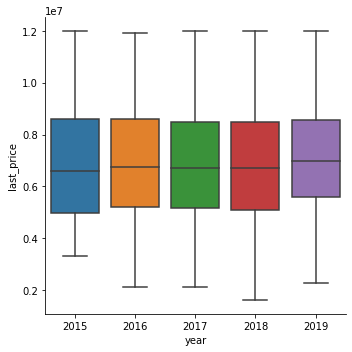

In [51]:
date = ['weekday', 'month', 'year']
for val in date:
    sns.catplot(x=val, y="last_price", kind="box", data=spb_center)
    # вычислим коэффициент корреляции
    correlation_spb(val)
    
sns.despine()

#### Вывод
1. Для квартир в центре Санкт-Петербурга прямопропорциональная зависимость стоимости от числа комнат выражена сильнее, коэффициент корреляции составляет 0.47, в то время как для Санкт-Петербурга и области равен 0.42. 
2. По сравнению с рынком недвижимости всех районов Санкт-Петербурга и соседних населённых пунктов, стоимость квартиры в центре Санкт-Петербурга на последнем этаже оценивается выше. Такое явление можно связать с отличными видовыми характеристиками верхних этажей.
3. Поскольку рассматриваются квартиры в центре Санкт-Петербурга, взаимосвязь стоимости квартиры от удаленности от центра слабее, что вполне логично. Коэффициент корреляции для квартир в центре Санкт-Петербурга и для квартир всех районов города и области составляет -0.20 и -0.32, соответственно. 
4. Так же как и для всей выборки средняя цена квартиры в центре Санкт-Петербурга незначительно снижается в летние месяцы и в январе, что вызвано сезонным спадом спроса в период отпусков и новогодних праздников. При этом в марте наблюдается повышение стоимости квартиры, что может быть связано с оживлением спроса на недвижимсоть после долгих новогодних праздников. Интересно отметить, что в объявлениях о продаже, опубликованных в воскресенье, средняя стоимость квартиры была выше по сравнению с остальными днями.
5. Отмеченный для квартир Санкт-Петербурге и соседних населенных пунктов резкий спад стоимости квартиры при переходе от 2014 года к 2015 году для квартир в центре Санкт-Петербурга проследить не удалось, так как отсутствуют данные за 2014 год. В интервале 2015-2019 гг. наблюдается незначительное повышение стоимости жилья, вероятно связанное с инфляцией.

## 5. Общий вывод

Исследованы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 гг. Основное предложение на рынке недвижимости Санкт-Петербурга и соседних населенных пунктов составляют квартиры стоимостью 3.5-7 млн.р. Для центра Санкт-Петербурга стоимость квартиры примерно на 2.5 млн.р. выше.

Определено, что чаще всего квартиры продаются в районе 3 месяцев (~95-100 дней). Аномально выглядят объявления со сроком размещения более 400 дней, то есть более одного года. 

Установлено, что на рыночную стоимость объектов недвижимости в данном регионе влияют следующие параметры:
1. **Общая площадь квартиры.** Из всех параметров площадь квартиры вносит наибольший вклад в стоимость квартиры, коэффициент корреляции составляет 0.69. Основную долю предложения составляют квартиры с площадью в интервале 40-75 м². Для объявлений в центре Санкт-Петербурга средняя площадь квартир примерно на 10 м² выше по сравнению со всеми районами. Объявления квартир с площадью более 115 м² являются редкими или аномальными.
2. **Расстояние до центра города.** Выделен сегмент квартир в центре Санкт-Петербурга в радиусе 8 км от центра. С увеличением удаленности от центра стоимость квартиры снижается, при этом коэффициент корреляции равен -0.32. Для квартир в центре Санкт-Петербурга взаимосвязь стоимости квартиры от удаленности от центра слабее.
3. **Число комнат.** Однокомнатные и двухкомнатные квартиры наиболее популярны на рынке жилья. Наблюдается низкое предложение студий, объявлений о продаже квартир с более чем 6 комнат практически нет. Наиболее доступны в цене студии и однокомнатные квартиры, и с увеличением количества комнат цена недвижимости повышается. Для квартир в центре Санкт-Петербурга зависимость стоимости от числа комнат выражена сильнее, коэффициент корреляции составляет 0.47, в то время как для Санкт-Петербурга и области равен 0.42.
4. **Высота потолков.** Наиболее часто встречаются квартиры с высотой потолков ~ 2.5 и 2.75 м. Редкими и выбивающимися значениями можно считать объявления с высотой потолков более 3.1 м. Следует обратить внимание на объявления квартир с аномально низкими потолками, < 2.5 м. Для некоторых квартир высота потолков достигаем 1-2 м., что противоречит узаконенным строительным нормам и правилам.
5. **Этаж квартиры.** Как правило, квартиры на первом или последнем этаже продаются по более низкой цене, чем квартиры на других этажах. Однако стоимость квартиры в центре Санкт-Петербурга на последнем этаже оценивается выше.
6. **Дата размещения.** День недели и месяц публикации объявления не оказывают существенного влияния на стоимость квартиры. Средняя цена квартиры в продаже лишь незначительно снижается в летние месяцы и в январе, что связано с сезонным спадом спроса. При этом стоимость недвижимости может существенно колебаться в зависимости от года, что может быть связано с макроэкономической ситуацией в стране.